# **ディープラーニング効果測定 問題3**

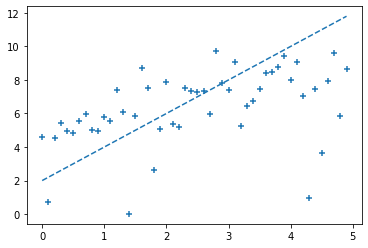

Epoch:0/70 Error:3.803591777865389


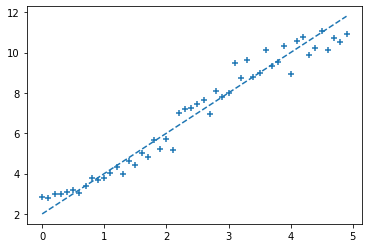

Epoch:5/70 Error:0.1576338856367377


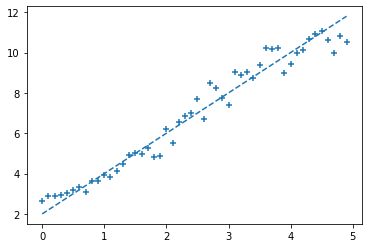

Epoch:10/70 Error:0.15628818835732866


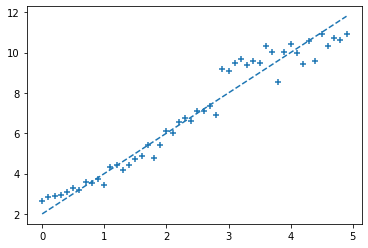

Epoch:15/70 Error:0.1991735343192651


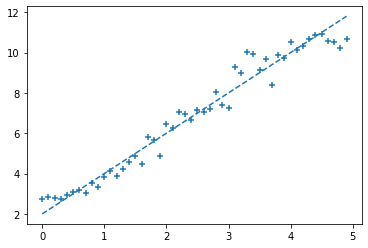

Epoch:20/70 Error:0.16240750600286988


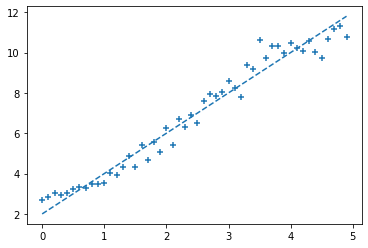

Epoch:25/70 Error:0.15141582181686536


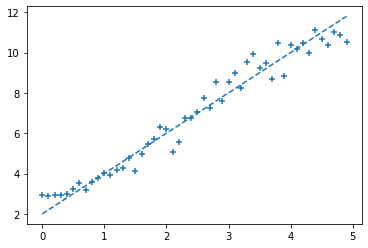

Epoch:30/70 Error:0.157534660413033


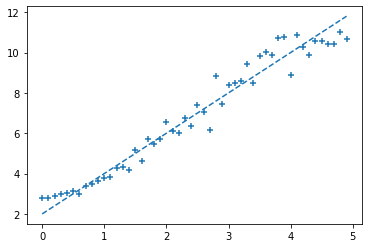

Epoch:35/70 Error:0.17081648574334196


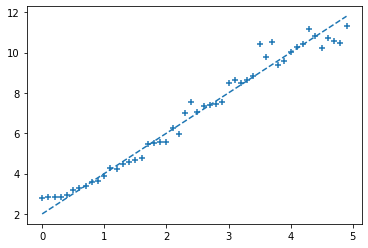

Epoch:40/70 Error:0.10433309704766104


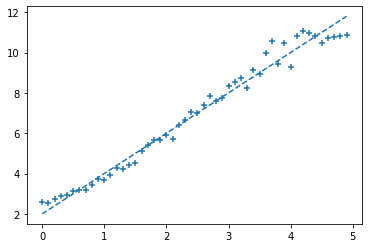

Epoch:45/70 Error:0.08884125470811118


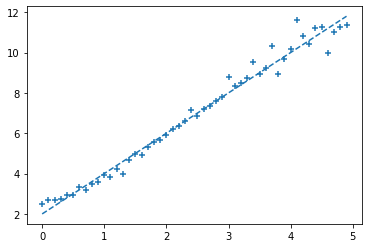

Epoch:50/70 Error:0.08594384053044973


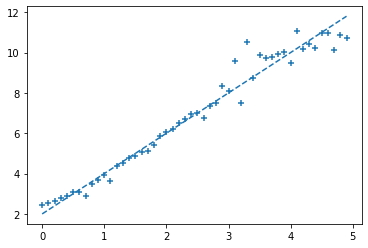

Epoch:55/70 Error:0.14289036364883928


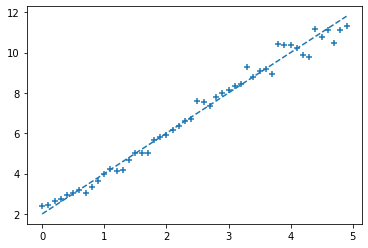

Epoch:60/70 Error:0.057992599375499464


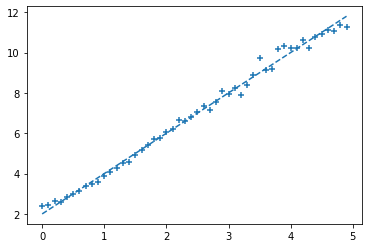

Epoch:65/70 Error:0.028669355950862726


In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# -- 入力と正解の用意 --

# 入力データは0～5、0.1刻みのデータとする
input_data = np.arange(0, 5, 0.1)  # 入力

# 正解データは y = 2x + 2の直線とする
correct_data =  2 * (input_data) + 2

n_data = len(correct_data)  # データ数

# -- 各設定値 --
# ■■■(1)-1 入力層のニューロン数
n_in = 1
# ■■■(1)-2 中間層のニューロン数
n_mid = 2
# ■■■(1)-3 出力層のニューロン数
n_out = 1

wb_width = 0.01  # 重みとバイアスの広がり具合
eta = 0.1  # 学習係数

# ■■■(2) エポックの初期化
epoch = 70

interval = 5  # 経過の表示間隔

# -- 中間層 --
class MiddleLayer:
    def __init__(self, n_upper, n):  # 初期設定
        self.w = wb_width * np.random.randn(n_upper, n)  # 重み（行列）
        self.b = wb_width * np.random.randn(n)  # バイアス（ベクトル）

    def forward(self, x):  # 順伝播
        self.x = x
        # workに 入力値×重み＋バイアスの行列積を代入
        work = np.dot(x, self.w) + self.b
    
        # ■■■(3) 活性化関数として、シグモイド関数を使用する■■■
        self.y = 1/(1+np.exp(-work))

    
    def backward(self, grad_y):  # 逆伝播
        delta = grad_y * (1-self.y)*self.y  # シグモイド関数の微分
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        self.grad_x = np.dot(delta, self.w.T) 
        
    def update(self, eta):  # 重みとバイアスの更新
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

# -- 出力層 --
class OutputLayer:
    def __init__(self, n_upper, n):  # 初期設定
        self.w = wb_width * np.random.randn(n_upper, n)  # 重み（行列）
        self.b = wb_width * np.random.randn(n)  # バイアス（ベクトル）
    
    def forward(self, x):  # 順伝播
        self.x = x
        u = np.dot(x, self.w) + self.b
        # ■■■(4) 活性化関数として、恒等関数を使用する
        self.y = u
    
    def backward(self, t):  # 逆伝播

        # ■■■(5) 出力と正解値との差をdeltaに代入する
        delta = self.y - t
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        self.grad_x = np.dot(delta, self.w.T) 

    def update(self, eta):  # 重みとバイアスの更新
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b


# -- 各層の初期化 --
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

# -- 学習 --　■■(6) 設定した回数分繰り返す
for i in range(epoch):

    # インデックスをシャッフル
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)
    
    # 結果の表示用
    total_error = 0
    plot_x = []
    plot_y = []
    
    for idx in index_random:
        
        x = input_data[idx:idx+1]  # 入力
        t = correct_data[idx:idx+1]  # 正解
        
        # 順伝播
        middle_layer.forward(x.reshape(1, 1))  # 入力を行列に変換
        output_layer.forward(middle_layer.y)  

        # 逆伝播
        output_layer.backward(t.reshape(1, 1))  # 正解を行列に変換
        middle_layer.backward(output_layer.grad_x)
        
        # 重みとバイアスの更新
        middle_layer.update(eta)
        output_layer.update(eta)
        
        if i%interval == 0:
            
            y = output_layer.y.reshape(-1)  # 行列をベクトルに戻す

            # 誤差の計算 ■■(7) 二乗和誤差の結果を代入する■■■■
            total_error += 1.0/2.0 * np.sum(np.square(y - t))
            
            # 出力の記録
            plot_x.append(x)
            plot_y.append(y)
            
    if i%interval == 0:
        
        # 出力のグラフ表示
        plt.plot(input_data, correct_data, linestyle="dashed")
        plt.scatter(plot_x, plot_y, marker="+")
        plt.show()
        
        # エポック数と誤差の表示
        print("Epoch:" + str(i) + "/" + str(epoch), "Error:" + str(total_error/n_data))